The given dataset contains price of second-hand Hyundai grand i10 car with respect to year of making. Find the best linear relationship between year and price. Can you predict the possible price of a 2022 model second-hand grand i10? Please learn about lasso regression and create a model along with linear regression. Find out which one is performing better.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data=pd.read_csv('/content/car_age_price.csv')

In [3]:
data.head()

,Year,Price
0,2018,465000
1,2019,755000
2,2019,700000
3,2018,465000
4,2018,465000


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112 entries, 0 to 111
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Year    112 non-null    int64
 1   Price   112 non-null    int64
dtypes: int64(2)
memory usage: 1.9 KB


In [5]:
data.describe()

,Year,Price
count,112.000000,112.000000
mean,2016.669643,483866.044643
std,1.629616,91217.450533
min,2013.000000,300000.000000
25%,2015.000000,423750.000000
50%,2017.000000,500000.000000
75%,2017.000000,550000.000000
max,2020.000000,755000.000000


<Axes: >

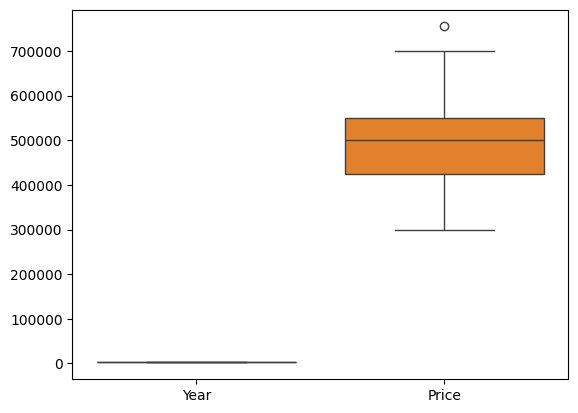

In [6]:
sns.boxplot(data)

In [10]:
data.Price.skew()

-0.08071088373618539

In [14]:
from scipy.stats import zscore


In [17]:
z_scores=zscore(data.Price)
threshold=2.5
outliers=data[(z_scores > threshold)|(z_scores < -threshold)]

In [18]:
outliers

,Year,Price
1,2019,755000


In [19]:
data.Price.iloc[outlier.index]=data[data.Year==outlier.Year[1]].mean()[1]
data.iloc[outlier.index]

,Year,Price
1,2019,577500


<Axes: >

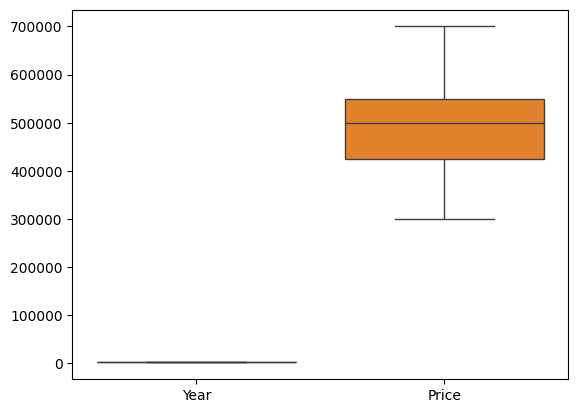

In [20]:
sns.boxplot(data)

<Axes: >

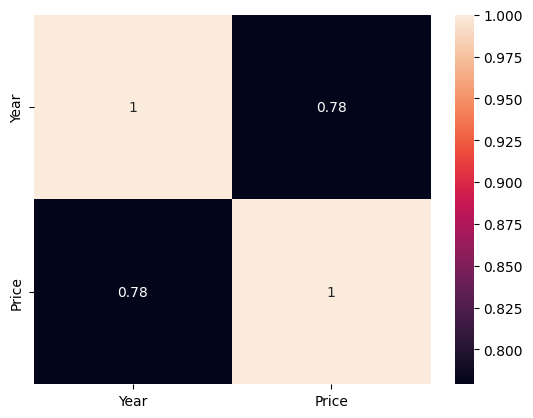

In [22]:
sns.heatmap(data.corr(),annot=True)

<Axes: xlabel='Year', ylabel='Price'>

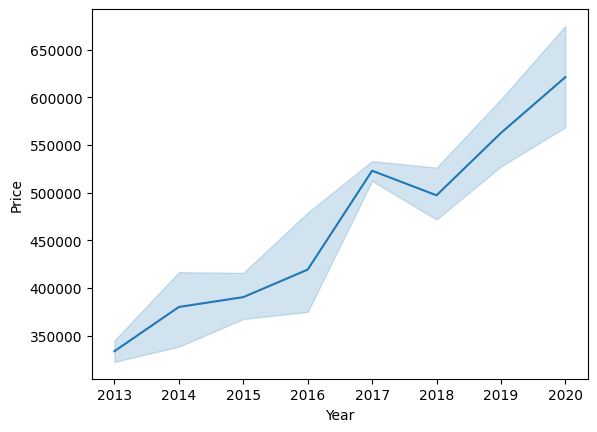

In [23]:
sns.lineplot(x=data.Year,y=data.Price)

In [24]:
from sklearn import linear_model

In [25]:
from sklearn.preprocessing import StandardScaler

In [27]:
X=data.Year.values.reshape(-1,1)
y=data.Price.values.reshape(-1,1)

In [29]:
from sklearn.model_selection import train_test_split

In [30]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.1)
lin_reg=linear_model.LinearRegression()

In [32]:
lin_model=lin_reg.fit(X_train,y_train)

In [34]:
y_pr=lin_model.predict(X_test)

In [35]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

In [36]:
from sklearn.metrics import r2_score

In [74]:
mean_linear=mean_squared_error(y_test,y_pr)
meann_linear=mean_absolute_error(y_test,y_pr)

In [40]:
mean_linear

42037.185485233866

In [75]:
meann_linear

42037.101097046085

In [42]:
r2=r2_score(y_test,y_pr)

In [43]:
r2

0.7143611262022574

In [ ]:
#scaling

In [44]:
sc=StandardScaler()
X_sc=sc.fit_transform(X)
y_sc=sc.fit_transform(y)

In [46]:
X_sc_train,X_sc_test,y_sc_train,y_sc_test=train_test_split(X_sc,y_sc,test_size=0.1,random_state=42)

In [47]:
lin_model_sc=lin_reg.fit(X_sc_train,y_sc_train)
y_sc_pr=lin_model_sc.predict(X_sc_test)

In [76]:
mean_linear_sc=mean_squared_error(y_sc_test,y_sc_pr)
meann_linear_sc=mean_absolute_error(y_sc_test,y_sc_pr)

In [49]:
mean_linear_sc

0.6048056593969112

In [77]:
meann_linear_sc

0.7182033074663496

In [51]:
r2_sc=r2_score(y_sc_test,y_sc_pr)

In [52]:
r2_sc

0.4129484470640048

In [53]:
data_1=pd.DataFrame({'Year':[2022]}).values.reshape(-1,1)

In [55]:
lin_model=lin_reg.fit(X_train,y_train)
y_pr22=lin_model.predict(data_1)


In [56]:
y_pr22

array([[703852.53390457]])

In [ ]:
#price 703852 linear

In [57]:
lasso = linear_model.Lasso(alpha=1)

In [59]:
lasso_model=lasso.fit(X_train, y_train)
y_pr = lasso_model.predict(X_test)

In [60]:
y_pr

array([495340.65561831, 495340.65561831, 328532.81998052, 411936.73779941,
       495340.65561831, 620446.53234664, 495340.65561831, 578744.5734372 ,
       495340.65561831, 495340.65561831, 537042.61452775, 411936.73779941])

In [78]:
mean_lasso=mean_squared_error(y_test,y_pr)
meann_lasso=mean_absolute_error(y_test,y_pr)

In [62]:
mean_lasso

42037.101097046085

In [79]:
meann_lasso

42037.101097046085

In [81]:
lasso_model_sc=lasso.fit(X_sc_train,y_sc_train)   #scaling
y_sc_pr=lasso_model_sc.predict(X_sc_test)

In [82]:
mean_lasso_sc=mean_squared_error(y_sc_test,y_sc_pr)
meann_lasso_sc=mean_absolute_error(y_sc_test,y_sc_pr)

In [73]:
mean_lasso_sc

0.7182033074663496

In [84]:
meann_lasso_sc

0.7182033074663496

In [ ]:
##with scaling linear model of 2022 hyundai car is good